# INTRODUÇÃO
A inteligência artificial (IA) tem o potencial de revolucionar o diagnóstico e o gerenciamento de doenças, realizando uma classificação difícil para especialistas humanos e revisando rapidamente imensas quantidades de imagens.
Portanto, esse projeto visa distinguir radiografias de pacientes com pneumonia e com o pulmão normal.

## PNEUMONIA

### O que é pneumonia? 

A pneumonia é um tipo de inflamação que afeta os pulmões e que, geralmente, está relacionada a uma infecção.

### COMO É FEITO O DIAGNÓSTICO DA PNEUMONIA?
O médico pode suspeitar de pneumonia através dos sintomas relatados pelo paciente associados ao exame clínico. O diagnóstico pode ser confirmado após a realização de uma radiografia do tórax. Na maioria das vezes, somente isso é preciso.

<img src="pulmao.jpeg" style="widht:50;heigth:50" >

## CONJUNTO DE DADOS
Neste dataset existem 5.863 imagens de raios-X (JPEG) dividas em 2 categorias (Pneumonia/Normal). 
As imagens de raios-X de tórax (anterior-posterior) foram selecionadas de pacientes pediátricos de um a cinco anos do Centro Médico Infantil e Mulheres de Guangzhou.. Toda a radiografia de tórax foi realizada como parte do atendimento clínico de rotina dos pacientes.

# IMPORTAÇÃO DAS BIBLIOTECAS

In [3]:
import os
import cv2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import save_model


# EXTRAÇÃO DOS PIXELS DAS IMAGENS

In [6]:
train_dir = 'chest_xray/train'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    color_mode='rgb',
    image_size=(300, 300),
    batch_size=32
)

Found 5216 files belonging to 2 classes.


2023-03-08 13:11:28.180287: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5216]
	 [[{{node Placeholder/_0}}]]
2023-03-08 13:11:28.181202: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5216]
	 [[{{node Placeholder/_0}}]]


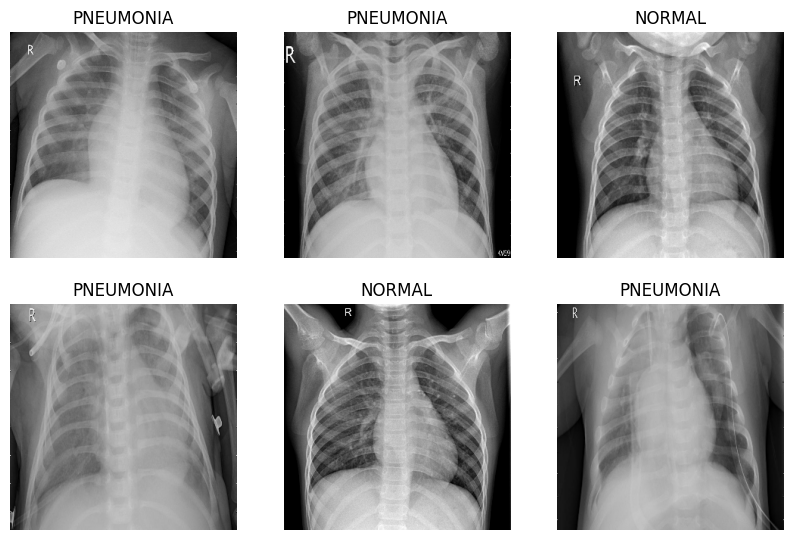

In [144]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype("int32")))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [7]:
arquivos=[]
for dirname, _, filenames in os.walk('chest_xray'):
    for filename in filenames:
        if filename.endswith('jpeg'):
            print(os.path.join(dirname, filename))
            arquivos.append(os.path.join(dirname, filename))

chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg
chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg
chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg
chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg
chest_xray/test/PNEUMONIA/person1647_virus_2848.jpeg
chest_xray/test/PNEUMONIA/person1675_virus_2891.jpeg
chest_xray/test/PNEUMONIA/person89_bacteria_440.jpeg
chest_xray/test/PNEUMONIA/person35_virus_80.jpeg
chest_xray/test/PNEUMONIA/person122_bacteria_582.jpeg
chest_xray/test/PNEUMONIA/person119_bacteria_565.jpeg
chest_xray/test/PNEUMONIA/person1662_virus_2875.jpeg
chest_xray/test/PNEUMONIA/person85_bacteria_422.jpeg
chest_xray/test/PNEUMONIA/person1669_virus_2884.jpeg
chest_xray/test/PNEUMONIA/person39_virus_85.jpeg
chest_xray/test/PNEUMONIA/person36_virus_81.jpeg
chest_xray/test/PNEUMONIA/person134_bacteria_640.jpeg
chest_xray/test/PNEUMONIA/person138_bacteria_659.jpeg
chest_xray/test/PNEUMONIA/person92_bacteria_450.jpeg
chest_xray/test/PNEUMONIA/person34_virus_76.jpeg
ch

In [8]:
largura, altura = 128, 128

In [9]:
imagens = [] #informações sobre a imagem(TAMANHO E COR)
classes = [] #imagem do NORMAL OU PNEUMONIA

In [8]:
imagem.shape

(1416, 1776, 3)

In [11]:
imagem.shape

(128, 128)

In [10]:
for imagem_caminho in arquivos:
    #print(imagem_caminho)
    imagem = cv2.imread(imagem_caminho)
    (H, W) = imagem.shape[:2]
    
    imagem = cv2.resize(imagem, (largura, altura))
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    
    imagem = imagem.ravel()
    #print(imagem.shape)
    
    imagens.append(imagem)
    nome_imagem = os.path.basename(os.path.normpath(imagem_caminho))
    #print(nome_imagem)
    
    if nome_imagem.startswith('p'):
        classe = 0
    else:
        classe = 1
        
    classes.append(classe)
    print(classe)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [17]:
type(imagens), type(classes)

(list, list)

In [11]:
X = np.asarray(imagens)
y = np.asarray(classes)

In [19]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [24]:
X.shape

(5856, 16384)

In [25]:
y.shape

(5856,)

In [111]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [29]:
np.unique(y, return_counts=True)

(array([0, 1]), array([4273, 1583]))

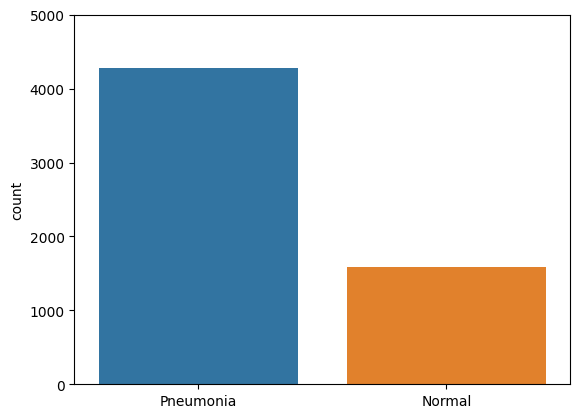

In [12]:
sns.countplot(x=y);
plt.xticks([0,1], ['Pneumonia','Normal'])
plt.ylim(0,5000);

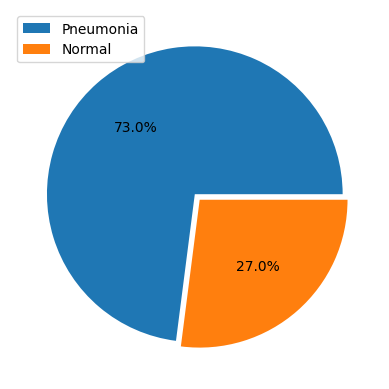

In [13]:
porcentagem = pd.DataFrame(y).value_counts(normalize=True)
plt.pie(porcentagem, explode = [0,0.05], autopct='%1.1f%%')
plt.legend(labels=['Pneumonia', 'Normal'], );

# NORMALIZAÇÃO DOS DADOS

In [33]:
X[0].max(), X[0].min()

(255, 0)

In [35]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [36]:
X[0].max(), X[0].min()

(1.0, 0.0)

In [38]:
X[0]

array([0.4       , 0.78039216, 0.76470588, ..., 0.09411765, 0.09803922,
       0.09411765])


# BASES TREINAMENTO E TESTE

In [39]:
X.shape

(5856, 16384)

In [41]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_treinamento

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04313725, 0.04313725, 0.04313725, ..., 0.        , 0.        ,
        0.        ],
       [0.04705882, 0.10980392, 0.14117647, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.36862745, 0.38039216, 0.63137255, ..., 0.        , 0.        ,
        0.        ],
       [0.02352941, 0.03921569, 0.0745098 , ..., 0.        , 0.        ,
        0.        ]])

In [44]:
X_treinamento.shape, y_treinamento.shape

((4684, 16384), (4684,))

In [45]:
X_teste.shape, y_teste.shape

((1172, 16384), (1172,))

# CONSTRUÇÃO E TREINAMENTO DA REDE NEURAL

In [46]:
(16384 + 2)/2

8193.0

In [47]:
#16384 neuronios ligados a 8193 da camada oculta
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape = (16384,), units = 8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units = 8193, activation ='relu'))
network1.add(tf.keras.layers.Dense(units = 1, activation='sigmoid')) #camada saida

In [48]:
network1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


In [49]:
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
historico = network1.fit(X_treinamento, y_treinamento, epochs=10)

Epoch 1/10
147/147 [==============================] - 476s 3s/step - loss: 5.1934 - accuracy: 0.8147
Epoch 2/10
147/147 [==============================] - 476s 3s/step - loss: 0.2514 - accuracy: 0.9005
Epoch 3/10
147/147 [==============================] - 350s 2s/step - loss: 0.2057 - accuracy: 0.9161
Epoch 4/10
147/147 [==============================] - 319s 2s/step - loss: 0.2174 - accuracy: 0.9133
Epoch 5/10
147/147 [==============================] - 275s 2s/step - loss: 0.1898 - accuracy: 0.9298
Epoch 6/10
147/147 [==============================] - 275s 2s/step - loss: 0.1805 - accuracy: 0.9291
Epoch 7/10
147/147 [==============================] - 273s 2s/step - loss: 0.1804 - accuracy: 0.9291
Epoch 8/10
147/147 [==============================] - 297s 2s/step - loss: 0.1552 - accuracy: 0.9411
Epoch 9/10
147/147 [==============================] - 275s 2s/step - loss: 0.1673 - accuracy: 0.9332
Epoch 10/10
147/147 [==============================] - 273s 2s/step - loss: 0.1839 - accura

# AVALIAÇÃO DA REDE NEURAL

In [53]:
historico.history.keys()

dict_keys(['loss', 'accuracy'])

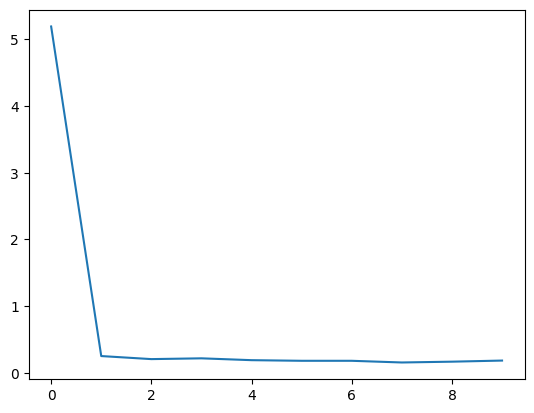

In [55]:
plt.plot(historico.history['loss']);

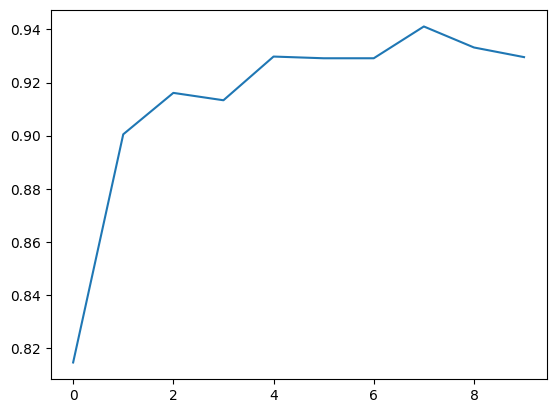

In [56]:
plt.plot(historico.history['accuracy']);

In [57]:
X_teste.shape

(1172, 16384)

In [58]:
bprevisoes = network1.predict(X_teste)

37/37 [==============================] - 4s 107ms/step


In [59]:
previsoes

array([[1.9274169e-01],
       [2.3080101e-03],
       [8.4342305e-03],
       ...,
       [5.0704904e-02],
       [4.6526991e-05],
       [6.4446855e-01]], dtype=float32)

In [62]:
# 0 FALSE => PNEUMONIA
# 1 TRUE = > NORMAL
previsoes = (previsoes > 0.5)
previsoes

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [63]:
y_teste

array([0, 0, 0, ..., 0, 0, 1])

In [65]:
accuracy_score(y_teste, previsoes)

0.9351535836177475

In [68]:

cm = confusion_matrix(y_teste, previsoes)
cm

array([[813,  26],
       [ 50, 283]])

<Axes: >

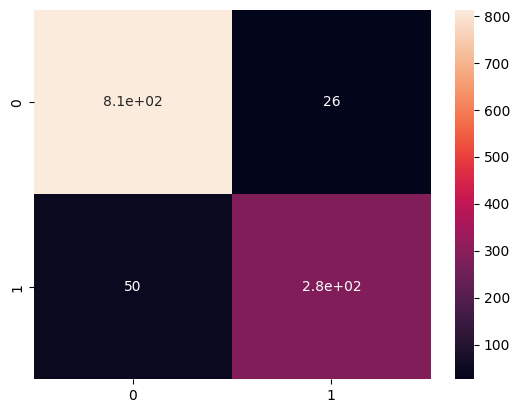

In [69]:
sns.heatmap(cm, annot=True)

In [71]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       839
           1       0.92      0.85      0.88       333

    accuracy                           0.94      1172
   macro avg       0.93      0.91      0.92      1172
weighted avg       0.93      0.94      0.93      1172



# SALVAR REDE NEURAL

In [72]:
model_json = network1.to_json()
with open('network1.json', 'w') as json_file:
    json_file.write(model_json)

# SALVAR PESOS DA REDE NEURAL

In [77]:
network1_saved = save_model(network1, 'weights1.hdf5')

/var/folders/p5/gvsnflnd44l3y24z991ch7m80000gn/T/ipykernel_20913/17374695.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network1_saved = save_model(network1, 'weights1.hdf5')


In [78]:
with open('network1.json') as json_file:
    json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 16384], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 16384], "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 16384]}}, {"module": "keras.layers", "class_name": "Dense

# CARREGAR OS PESOS DA REDE NEURAL

In [88]:
network1_loaded = tf.keras.models.model_from_json(json_saved_model)
network1_loaded.load_weights('../projeto_xray/weights1.hdf5')
network1_loaded.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [89]:
network1_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________
